![img_uba](https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg)


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
## Noelia Qualindi

In [1]:
!pip uninstall -y tensorflow keras
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
  Using cached tensorflow-2.17.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-macosx_12_0_arm64.whl (236.1 MB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.16.2 requires tensorflow==2.16.2; platform_system == "Darwin" and platform_machine == "arm64", but you have tensorflow 2.17.0 which is incompatible.


In [2]:
!pip install transformers --quiet

In [8]:
from transformers import TFBertModel
import tensorflow

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Modelo con 3 Clases

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_metrics(history):
    # Obtener los datos de precisión y pérdida de entrenamiento y validación
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    
    epoch_count = range(1, len(acc) + 1)
    
    # Graficar precisión
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=epoch_count, y=acc, label='Train Accuracy')
    sns.lineplot(x=epoch_count, y=val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()
    
    # Graficar pérdida
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=epoch_count, y=loss, label='Train Loss')
    sns.lineplot(x=epoch_count, y=val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [5]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  46653      0  0:00:02  0:00:02 --:--:-- 60773
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0-     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   435k      0  0:00:16  0:00:16 --:--:-- 1592k


In [1]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [2]:
df.tail()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
15741,Tammy Kay,https://lh3.googleusercontent.com/a-/AOh14GhYP...,I believe that this is by far the best app wit...,5,0,NaN,2018-02-17 06:09:03,NaN,NaN,newest,com.appxy.planner
15742,Ysm Johan,https://lh3.googleusercontent.com/a-/AOh14Ggmd...,It sometimes crashes a lot!!,5,0,4.3.7,2018-02-15 10:45:22,NaN,NaN,newest,com.appxy.planner
15743,casey dearden,https://lh3.googleusercontent.com/a-/AOh14Gg2U...,Works well for what I need,5,0,4.3.7,2018-02-09 18:40:37,NaN,NaN,newest,com.appxy.planner
15744,Jerry G Tamate,https://lh3.googleusercontent.com/a-/AOh14GiTP...,Love it.,5,0,NaN,2018-02-06 12:36:17,NaN,NaN,newest,com.appxy.planner
15745,Ahmed elsalamouni,https://lh3.googleusercontent.com/-9QSxVUhCoDI...,Really amazing and helped me sooo much just i ...,5,6,4.3.7,2018-02-04 22:57:09,NaN,NaN,newest,com.appxy.planner


In [8]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


In [9]:
print(df.columns)

Index(['userName', 'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder',
       'appId'],
      dtype='object')


/var/folders/ml/g_sxsst10mj890krz6gpp0980000gn/T/ipykernel_20326/2125633814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['score'], palette=palette)


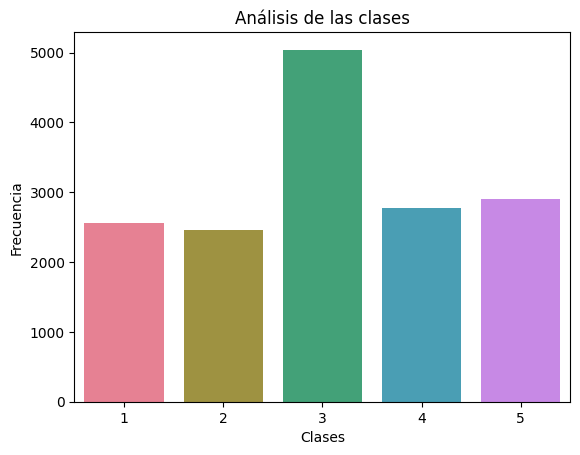

In [8]:
# ¿Cómo están balanceados los datos?
palette = sns.color_palette("husl", df['score'].nunique())  

sns.countplot(x=df['score'], palette=palette)

plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Análisis de las clases')

plt.show()

## Limpieza de datos

In [11]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

In [12]:
word2idx_output = {word: idx for idx, word in enumerate(sorted(df.sentiment.unique()))}

# Agregar manualmente los tokens especiales
word2idx_output['<sos>'] = len(word2idx_output)
word2idx_output['<eos>'] = len(word2idx_output) + 1

print("Diccionario de salida:", word2idx_output)

Diccionario de salida: {0: 0, 1: 1, 2: 2, '<sos>': 3, '<eos>': 5}


/var/folders/ml/g_sxsst10mj890krz6gpp0980000gn/T/ipykernel_92888/767154524.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


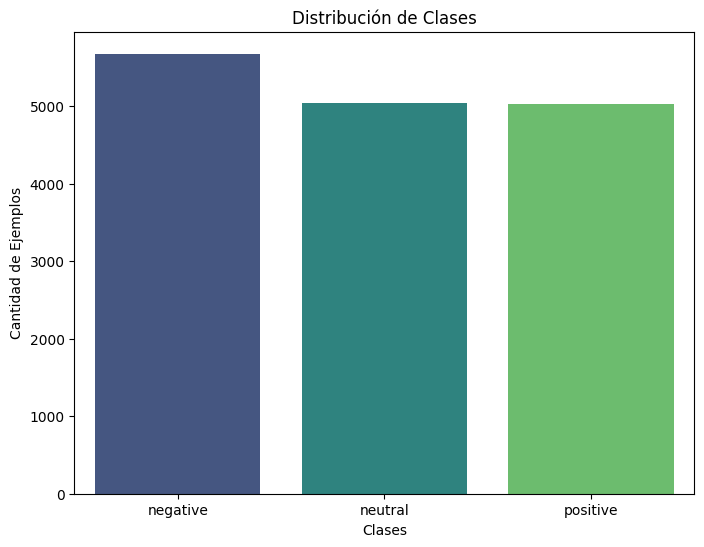

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define los nombres de las clases
class_names = ['negative', 'neutral', 'positive']

# Cuenta la cantidad de ejemplos en cada clase
class_distribution = df['sentiment'].value_counts()

# Mapea las etiquetas numéricas a los nombres de clases
class_distribution.index = class_names

# Grafica la distribución de clases
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Cantidad de Ejemplos')
plt.show()


In [14]:
from tensorflow.keras.utils import to_categorical

y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
num_classes = y.shape[1]
print("output shape:", num_classes)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


sentences shape: (15746,)
["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK."
 'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!'
 "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"]


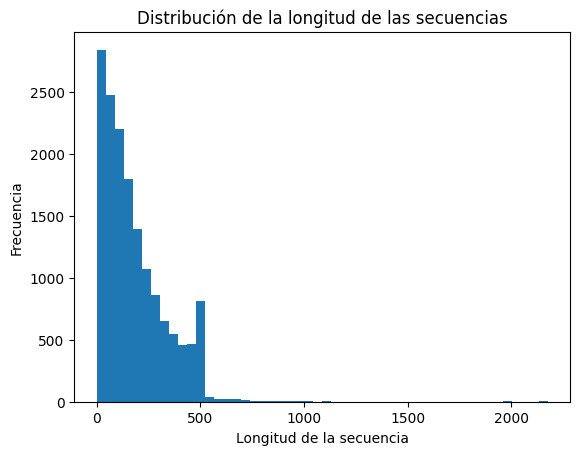

Longitud máxima: 2176
Longitud media: 180.92677505398197
Percentil 90 de la longitud: 422.0
Mediana: 139.0
Media 181.0
Moda ModeResult(mode=4, count=178)


In [15]:
import numpy as np
import scipy.stats as stats

sentences = df['content'].values
print("sentences shape:", sentences.shape)
print(sentences[:3])

sequence_lengths = [len(seq) for seq in sentences]
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Longitud de la secuencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de la longitud de las secuencias')
plt.show()

print(f"Longitud máxima: {max(sequence_lengths)}")
print(f"Longitud media: {np.mean(sequence_lengths)}")
print(f"Percentil 90 de la longitud: {np.percentile(sequence_lengths, 90)}")

print("Mediana:", round(np.median(sequence_lengths),0))
print('Media', round(np.mean(sequence_lengths),0))
print('Moda', stats.mode(sequence_lengths))

## Procesamiento, Tokenización y generador de datos


In [13]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer, TFBertModel
import numpy as np

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
from sklearn.model_selection import train_test_split

indices = np.arange(len(sentences))

idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)


print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [18]:
print(f"Cantidad de muestras en el conjunto de entrenamiento: {idx_train.shape[0]}")
print(f"Cantidad de muestras en el conjunto de validación: {idx_val.shape[0]}")
print(f"Cantidad de muestras en el conjunto de test: {idx_test.shape[0]}")

Cantidad de muestras en el conjunto de entrenamiento: 10076
Cantidad de muestras en el conjunto de validación: 2520
Cantidad de muestras en el conjunto de test: 3150


Dado que la longitud mediana es de 139, el max_length se pondra en 139 para que pueda capturar la mayor parte de la info relevante.

In [6]:
max_length = 139
num_classes = 3 # output shapes

Hiperparámetros

In [5]:
batch_size = 32
epochs = 15

In [21]:
import tensorflow

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, num_classes=3, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([num_classes]),
        ),
    )

In [22]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer,  num_classes=num_classes, max_length=max_length)
train_data = train_data.shuffle(100).batch(batch_size)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, num_classes=num_classes, max_length=max_length)
validation_data = validation_data.batch(batch_size)

2024-08-31 23:22:25.054106: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-31 23:22:25.054161: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-08-31 23:22:25.054182: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-08-31 23:22:25.054205: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-31 23:22:25.054219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [23]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [25]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

y_test = y[idx_test]

## BERT classification

### Sin descongelamiento de capas

In [29]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [3]:
import tensorflow as tf 

class BertLayer(tf.keras.layers.Layer):
    def __init__(self, model_name='bert-base-uncased', fine_tune_layers=None, unfreeze_all_layers=False, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = TFBertModel.from_pretrained(model_name)
        total_layers = len(self.bert_model.bert.encoder.layer)

        if unfreeze_all_layers:
            # Descongelar todas las capas
            print("Descongelando todas las capas:", total_layers)
            for layer in self.bert_model.layers:
                print(f"Layer name: {layer.name}, Trainable: {layer.trainable}")
                layer.trainable = True
        elif fine_tune_layers is not None:
            print(f"Descongelando {fine_tune_layers} capas de {total_layers}")
            for layer in self.bert_model.bert.encoder.layer[:-fine_tune_layers]:
                layer.trainable = False
            for layer in self.bert_model.bert.encoder.layer[-fine_tune_layers:]:
                layer.trainable = True
        else:
            # Congelar todas las capas por defecto
            self.bert_model.trainable = False
        
    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.pooler_output

def build_classification_model(model_name='bert-base-uncased', num_classes=3, max_length=140, fine_tune_layers=None, unfreeze_all_layers=False):
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
    
     # Crear instancia del BertLayer
    bert_layer = BertLayer(model_name=model_name, fine_tune_layers=fine_tune_layers, unfreeze_all_layers=unfreeze_all_layers)
    bert_output = bert_layer([input_ids, attention_mask])

    for layer in bert_layer.bert_model.bert.encoder.layer:
        print(f"Layer name: {layer.name}, Trainable: {layer.trainable}")

    x = tf.keras.layers.Dropout(0.2)(bert_output)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    
    model.summary()
    return model


In [32]:
bert_model_3 = build_classification_model(model_name='bert-base-uncased', num_classes=num_classes, max_length=max_length, unfreeze_all_layers=False)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Layer name: layer_._0, Trainable: False
Layer name: layer_._1, Trainable: False
Layer name: layer_._2, Trainable: False
Layer name: layer_._3, Trainable: False
Layer name: layer_._4, Trainable: False
Layer name: layer_._5, Trainable: False
Layer name: layer_._6, Trainable: False
Layer name: layer_._7, Trainable: False
Layer name: layer_._8, Trainable: False
Layer name: layer_._9, Trainable: False
Layer name: layer_._10, Trainable: False
Layer name: layer_._11, Trainable: False


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │      2,307 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history_3_classes = bert_model_3.fit(train_data, epochs=epochs, validation_data=validation_data)

Epoch 1/15


2024-08-31 23:27:03.421983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


    315/Unknown 277s 858ms/step - accuracy: 0.3499 - loss: 1.1616 - precision: 0.3466 - recall: 0.1058

2024-08-31 23:31:38.671184: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-31 23:31:38.671310: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_1/dropout_1/ReadVariableOp/_15]]
2024-08-31 23:31:38.671629: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17011738000131252352
2024-08-31 23:31:38.671636: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-08-31 23:31:38.671641: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12056087317623914880
2024-08-31 23:31:38.671646: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item can

315/315 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.3499 - loss: 1.1615 - precision: 0.3466 - recall: 0.1057 - val_accuracy: 0.3536 - val_loss: 1.0976 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15


2024-08-31 23:32:52.111865: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-08-31 23:32:52.111893: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-08-31 23:32:52.111902: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[functional_1/bert_layer_1/tf_bert_model_2/bert/Shape_1/_12]]
2024-08-31 23:32:52.111909: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-08-31 23:32:52.111916: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-08-31 23:32:52.111920: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-0

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.3496 - loss: 1.1440 - precision: 0.3644 - recall: 0.0916

2024-08-31 23:37:15.454100: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-08-31 23:37:15.454152: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-08-31 23:37:15.454177: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-08-31 23:37:15.454187: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 8790018507184402779
2024-08-31 23:37:15.454195: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-08-31 23:37:15.454200: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-08-31 23:37:15.454203: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send 

315/315 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.3496 - loss: 1.1440 - precision: 0.3644 - recall: 0.0916 - val_accuracy: 0.3651 - val_loss: 1.0948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15


2024-08-31 23:38:18.902608: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-08-31 23:38:18.902657: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-08-31 23:38:18.902693: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[functional_1/bert_layer_1/tf_bert_model_2/bert/Shape_1/_12]]
2024-08-31 23:38:18.902706: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-08-31 23:38:18.902711: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-08-31 23:38:18.902717: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-0

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 814ms/step - accuracy: 0.3477 - loss: 1.1427 - precision: 0.3492 - recall: 0.0785

2024-08-31 23:42:35.482121: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-08-31 23:42:35.482164: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-08-31 23:42:35.482168: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 8790018507184402779
2024-08-31 23:42:35.482170: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 14034537800115950549
2024-08-31 23:42:35.482174: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14122140630920598781
2024-08-31 23:42:35.482178: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5221481310177376021
2024-08-31 23:42:35.482180: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send i

315/315 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.3477 - loss: 1.1427 - precision: 0.3492 - recall: 0.0785 - val_accuracy: 0.3552 - val_loss: 1.0963 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15


2024-08-31 23:43:39.891314: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-08-31 23:43:39.891341: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-08-31 23:43:39.891343: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-08-31 23:43:39.891353: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-08-31 23:43:39.891356: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-08-31 23:43:39.891363: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-08-31 23:43:39.891367: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.3310 - loss: 1.1555 - precision: 0.3207 - recall: 0.0742

2024-08-31 23:47:48.743068: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-08-31 23:47:48.743136: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-08-31 23:47:48.743151: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-08-31 23:47:48.743161: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 8790018507184402779
2024-08-31 23:47:48.743164: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-08-31 23:47:48.743169: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-08-31 23:47:48.743171: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send 

315/315 ━━━━━━━━━━━━━━━━━━━━ 312s 991ms/step - accuracy: 0.3310 - loss: 1.1555 - precision: 0.3208 - recall: 0.0742 - val_accuracy: 0.3583 - val_loss: 1.0958 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15


2024-08-31 23:48:52.052928: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-08-31 23:48:52.052949: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-08-31 23:48:52.052952: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[functional_1/bert_layer_1/tf_bert_model_2/bert/Shape_1/_12]]
2024-08-31 23:48:52.052966: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-08-31 23:48:52.052969: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-08-31 23:48:52.052975: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.3437 - loss: 1.1421 - precision: 0.3723 - recall: 0.0832

2024-08-31 23:53:08.250334: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-08-31 23:53:08.250363: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-08-31 23:53:08.250367: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-08-31 23:53:08.250370: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11916584203643379456
2024-08-31 23:53:08.250373: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17480967266112468930
2024-08-31 23:53:08.250376: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-08-31 23:53:08.250380: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous rec

315/315 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.3437 - loss: 1.1421 - precision: 0.3723 - recall: 0.0832 - val_accuracy: 0.3563 - val_loss: 1.0967 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/15


2024-08-31 23:54:11.345426: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-08-31 23:54:11.345486: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-08-31 23:54:11.345505: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-08-31 23:54:11.345507: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-08-31 23:54:11.345529: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-08-31 23:54:11.345534: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 574883235086304587
2024-08-31 23:54:11.345537: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.3439 - loss: 1.1485 - precision: 0.3300 - recall: 0.0726

2024-08-31 23:58:20.207897: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-08-31 23:58:20.207943: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-08-31 23:58:20.207953: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-08-31 23:58:20.207961: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-08-31 23:58:20.207969: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17480967266112468930
2024-08-31 23:58:20.207972: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11916584203643379456
2024-08-31 23:58:20.207976: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous sen

315/315 ━━━━━━━━━━━━━━━━━━━━ 315s 999ms/step - accuracy: 0.3439 - loss: 1.1485 - precision: 0.3301 - recall: 0.0726 - val_accuracy: 0.3603 - val_loss: 1.0943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 7/15


2024-08-31 23:59:25.977894: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-08-31 23:59:25.977974: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-08-31 23:59:25.978014: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 574883235086304587
2024-08-31 23:59:25.978032: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-08-31 23:59:25.978045: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-08-31 23:59:25.978052: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-08-31 23:59:25.978057: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.3430 - loss: 1.1377 - precision: 0.3509 - recall: 0.0774

2024-09-01 00:03:47.888617: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-09-01 00:03:47.888638: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-09-01 00:03:47.888641: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-09-01 00:03:47.888654: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-09-01 00:03:47.888656: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-09-01 00:03:47.888662: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11916584203643379456
2024-09-01 00:03:47.888666: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send

315/315 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.3430 - loss: 1.1377 - precision: 0.3509 - recall: 0.0774 - val_accuracy: 0.3655 - val_loss: 1.0950 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 8/15


2024-09-01 00:04:51.877493: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:04:51.877533: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:04:51.877538: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:04:51.877550: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-09-01 00:04:51.877555: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:04:51.877562: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-09-01 00:04:51.877566: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.3404 - loss: 1.1425 - precision: 0.3558 - recall: 0.0695

2024-09-01 00:09:24.196117: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-09-01 00:09:24.196162: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-09-01 00:09:24.196164: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11916584203643379456
2024-09-01 00:09:24.196169: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-09-01 00:09:24.196172: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17011738000131252352
2024-09-01 00:09:24.196194: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17480967266112468930
2024-09-01 00:09:24.196203: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous re

315/315 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.3404 - loss: 1.1425 - precision: 0.3558 - recall: 0.0695 - val_accuracy: 0.3603 - val_loss: 1.0948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 9/15


2024-09-01 00:10:23.220147: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:10:23.220164: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:10:23.220181: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:10:23.220188: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-09-01 00:10:23.220191: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:10:23.220194: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[functional_1/bert_layer_1/tf_bert_model_2/bert/Shape_1/_12]]
2024-0

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.3431 - loss: 1.1356 - precision: 0.3689 - recall: 0.0676

2024-09-01 00:14:57.150593: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-09-01 00:14:57.150681: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-09-01 00:14:57.150690: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-09-01 00:14:57.150695: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17011738000131252352
2024-09-01 00:14:57.150698: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-09-01 00:14:57.150782: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 8790018507184402779
2024-09-01 00:14:57.150790: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv

315/315 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.3431 - loss: 1.1356 - precision: 0.3689 - recall: 0.0676 - val_accuracy: 0.3706 - val_loss: 1.0947 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 10/15


2024-09-01 00:16:03.353074: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:16:03.353112: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:16:03.353135: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:16:03.353146: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:16:03.353148: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-09-01 00:16:03.353157: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 574883235086304587
2024-09-01 00:16:03.353159: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.3463 - loss: 1.1360 - precision: 0.3682 - recall: 0.0643

2024-09-01 00:20:28.571122: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-09-01 00:20:28.571171: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-09-01 00:20:28.571177: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-09-01 00:20:28.571187: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-09-01 00:20:28.571199: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-09-01 00:20:28.571204: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11916584203643379456
2024-09-01 00:20:28.571209: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send

315/315 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.3463 - loss: 1.1360 - precision: 0.3682 - recall: 0.0643 - val_accuracy: 0.3643 - val_loss: 1.0953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 11/15


2024-09-01 00:21:32.466295: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:21:32.466333: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:21:32.466344: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:21:32.466349: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-09-01 00:21:32.466354: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:21:32.466360: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-09-01 00:21:32.466365: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.3439 - loss: 1.1324 - precision: 0.3520 - recall: 0.0606

2024-09-01 00:25:41.339224: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13650501238594150643
2024-09-01 00:25:41.339259: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13582000354421490711
2024-09-01 00:25:41.339264: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10268402652519531921
2024-09-01 00:25:41.339268: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3977671914358844301
2024-09-01 00:25:41.339277: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 6356518268738890817
2024-09-01 00:25:41.339336: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4916930703084278713
2024-09-01 00:25:41.339365: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

315/315 ━━━━━━━━━━━━━━━━━━━━ 312s 992ms/step - accuracy: 0.3439 - loss: 1.1325 - precision: 0.3520 - recall: 0.0605 - val_accuracy: 0.3710 - val_loss: 1.0944 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 12/15


2024-09-01 00:26:44.723585: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:26:44.723615: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 574883235086304587
2024-09-01 00:26:44.723631: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:26:44.723643: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:26:44.723648: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:26:44.723651: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 13118965535076203658
2024-09-01 00:26:44.723653: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.3446 - loss: 1.1312 - precision: 0.3477 - recall: 0.0543

2024-09-01 00:30:59.428094: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-09-01 00:30:59.428165: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-09-01 00:30:59.428171: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-09-01 00:30:59.428174: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11916584203643379456
2024-09-01 00:30:59.428178: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17480967266112468930
2024-09-01 00:30:59.428182: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-09-01 00:30:59.428236: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous rec

315/315 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.3446 - loss: 1.1312 - precision: 0.3477 - recall: 0.0543 - val_accuracy: 0.3687 - val_loss: 1.0950 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 13/15


2024-09-01 00:32:02.417359: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:32:02.417386: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-09-01 00:32:02.417391: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:32:02.417404: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:32:02.417412: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:32:02.417415: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 574883235086304587
2024-09-01 00:32:02.417424: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.3477 - loss: 1.1327 - precision: 0.3571 - recall: 0.0542

2024-09-01 00:36:14.711940: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16381431427969198298
2024-09-01 00:36:14.711970: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16485405874844158416
2024-09-01 00:36:14.711974: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-09-01 00:36:14.711977: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17011738000131252352
2024-09-01 00:36:14.711983: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 11916584203643379456
2024-09-01 00:36:14.711987: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17480967266112468930
2024-09-01 00:36:14.711994: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous re

315/315 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.3477 - loss: 1.1326 - precision: 0.3571 - recall: 0.0542 - val_accuracy: 0.3734 - val_loss: 1.0936 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 14/15


2024-09-01 00:37:18.948430: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:37:18.948456: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:37:18.948477: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:37:18.948485: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-09-01 00:37:18.948489: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:37:18.948505: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-09-01 00:37:18.948510: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 812ms/step - accuracy: 0.3455 - loss: 1.1303 - precision: 0.3383 - recall: 0.0531

2024-09-01 00:41:35.091597: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-09-01 00:41:35.091974: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-09-01 00:41:35.092380: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 8790018507184402779
2024-09-01 00:41:35.092399: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13650501238594150643
2024-09-01 00:41:35.092404: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14122140630920598781
2024-09-01 00:41:35.092407: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10268402652519531921
2024-09-01 00:41:35.092411: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

315/315 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.3455 - loss: 1.1302 - precision: 0.3384 - recall: 0.0531 - val_accuracy: 0.3655 - val_loss: 1.0946 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 15/15


2024-09-01 00:42:41.033952: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:42:41.033978: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:42:41.033984: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:42:41.033988: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 6211729000768216902
2024-09-01 00:42:41.033993: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:42:41.034003: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15098449862191842079
2024-09-01 00:42:41.034009: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.3502 - loss: 1.1279 - precision: 0.3390 - recall: 0.0480

2024-09-01 00:47:03.617820: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17011738000131252352
2024-09-01 00:47:03.617857: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5528621590603169955
2024-09-01 00:47:03.617867: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12056087317623914880
2024-09-01 00:47:03.617874: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 8790018507184402779
2024-09-01 00:47:03.617880: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15818930751832539842
2024-09-01 00:47:03.617882: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8573118586725712297
2024-09-01 00:47:03.617884: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

315/315 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.3502 - loss: 1.1279 - precision: 0.3391 - recall: 0.0480 - val_accuracy: 0.3679 - val_loss: 1.0951 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


2024-09-01 00:48:06.153891: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 9695335327346866632
2024-09-01 00:48:06.153930: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2629411905049203515
2024-09-01 00:48:06.153955: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 916167722005158486
2024-09-01 00:48:06.153961: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 574883235086304587
2024-09-01 00:48:06.153972: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11498614734489203624
2024-09-01 00:48:06.153976: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 13118965535076203658
2024-09-01 00:48:06.153978: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send ite

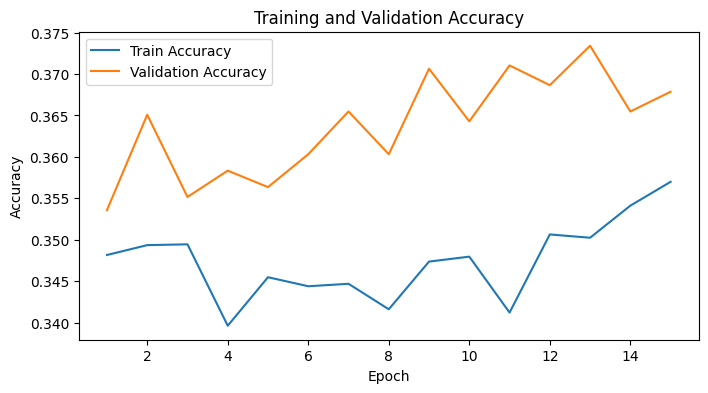

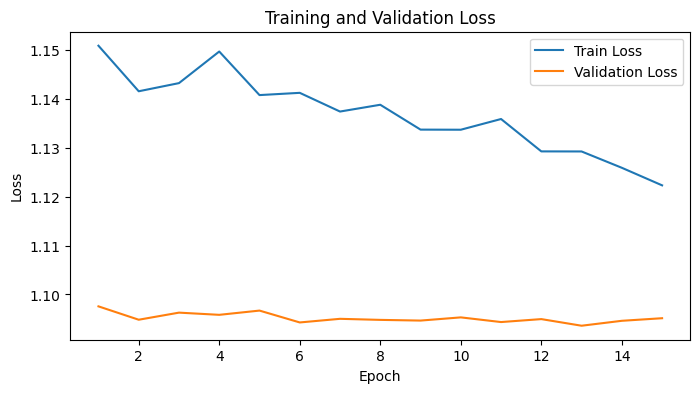

In [34]:
plot_train_metrics(history_3_classes)

### Predicciones y evaluación del modelo sin fine tuning

In [35]:
predictions = bert_model_3.predict(X_test)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = y_test  

print("true_labels:", true_labels)
print("predicted_labels:", predicted_labels)
print("unique values in true_labels:", np.unique(true_labels))
print("unique values in predicted_labels:", np.unique(predicted_labels))

99/99 ━━━━━━━━━━━━━━━━━━━━ 73s 679ms/step
true_labels: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
predicted_labels: [1 0 2 ... 2 1 0]
unique values in true_labels: [0. 1.]
unique values in predicted_labels: [0 1 2]


In [36]:
# Convertir true_labels de one-hot encoding a etiquetas enteras
true_labels = np.argmax(y_test, axis=-1)

# Imprimir las etiquetas para ver la conversión
print("true_labels:", true_labels)
print("predicted_labels:", predicted_labels)
print("unique values in true_labels:", np.unique(true_labels))
print("unique values in predicted_labels:", np.unique(predicted_labels))

true_labels: [0 0 0 ... 1 2 2]
predicted_labels: [1 0 2 ... 2 1 0]
unique values in true_labels: [0 1 2]
unique values in predicted_labels: [0 1 2]


Classification Report:
               precision    recall  f1-score   support

    negative       0.33      0.48      0.39       997
     neutral       0.32      0.18      0.23       979
    positive       0.36      0.36      0.36      1174

    accuracy                           0.34      3150
   macro avg       0.34      0.34      0.33      3150
weighted avg       0.34      0.34      0.33      3150



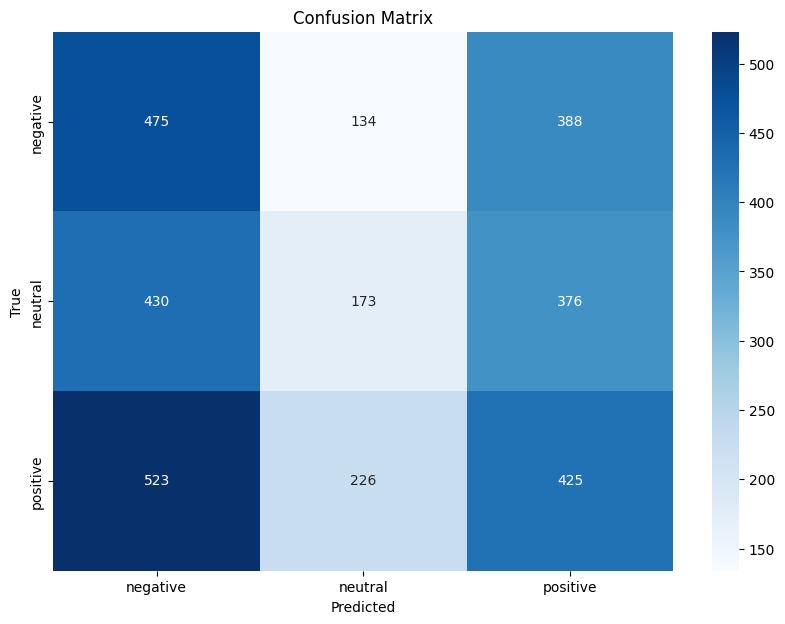

In [37]:
# Imprimir el classification report y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluar el modelo

print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=['negative', 'neutral', 'positive']))

# Crear y mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [38]:
# Calcular la exactitud (accuracy)
scores = bert_model_3.evaluate(X_test, y_test)
print(scores[0])
print(scores[1])
print(scores[2])

99/99 ━━━━━━━━━━━━━━━━━━━━ 98s 928ms/step - accuracy: 0.3287 - loss: 1.1045 - precision: 0.5320 - recall: 0.0091
1.1030139923095703
0.34063491225242615
0.4893617033958435


### Guardar el modelo

In [42]:
bert_model_3.save_weights('bert_model.weights.h5')

## Testeo

In [1]:
class_names = ['negative', 'neutral', 'positive']  

def test_app(text, model, class_names):
    tf_batch = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length, # truncates if len(s) > max_length
        return_token_type_ids=False,
        return_attention_mask=True,
        pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
        truncation=True,
        return_tensors='tf'
    )

    print("Inputs ids:", tf_batch['input_ids'])
    print("Attention mask:", tf_batch['attention_mask'])

    X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]
    
    y_prob_ensayo = model.predict(X_ensayo)
    y_prob = np.argmax(y_prob_ensayo, axis=1)
    print("Clasificación:", class_names[int(y_prob)])

In [9]:
bert_model_loaded = build_classification_model(model_name='bert-base-uncased', num_classes=num_classes, max_length=max_length, unfreeze_all_layers=False)

2024-09-01 02:40:57.834486: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-09-01 02:40:57.834523: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-09-01 02:40:57.834530: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-09-01 02:40:57.834552: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-01 02:40:57.834570: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias'

Layer name: layer_._0, Trainable: False
Layer name: layer_._1, Trainable: False
Layer name: layer_._2, Trainable: False
Layer name: layer_._3, Trainable: False
Layer name: layer_._4, Trainable: False
Layer name: layer_._5, Trainable: False
Layer name: layer_._6, Trainable: False
Layer name: layer_._7, Trainable: False
Layer name: layer_._8, Trainable: False
Layer name: layer_._9, Trainable: False
Layer name: layer_._10, Trainable: False
Layer name: layer_._11, Trainable: False


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_1        │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ bert_layer_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │      2,307 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,307 (9.01 KB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Cargar los pesos utilizando by_name=True
bert_model_loaded.load_weights('bert_model.weights.h5')

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
class_names = ['negative', 'neutral', 'positive']  

In [14]:
text = "I hate this app, it's horrible!"

test_app(text, bert_model_loaded, class_names)

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439  1010  2009  1005  1055  9202   999   102
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

2024-09-01 02:42:02.326998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Clasificación: negative


In [15]:
import gradio as gr
import numpy as np
import tensorflow as tf

def predict_sentiment(text):
    tf_batch = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length,
        return_token_type_ids=False,
        return_attention_mask=True,
        pad_to_max_length=True,
        truncation=True,
        return_tensors='tf'
    )

    X_ensayo = [tf_batch['input_ids'], tf_batch['attention_mask']]
    
    y_prob_ensayo = bert_model_loaded.predict(X_ensayo)
    y_prob = np.argmax(y_prob_ensayo, axis=1)
    
    return class_names[int(y_prob)]

iface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="text",
    title="Clasificación de Sentimientos con BERT",
    description="Ingrese un texto para clasificar su sentimiento."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


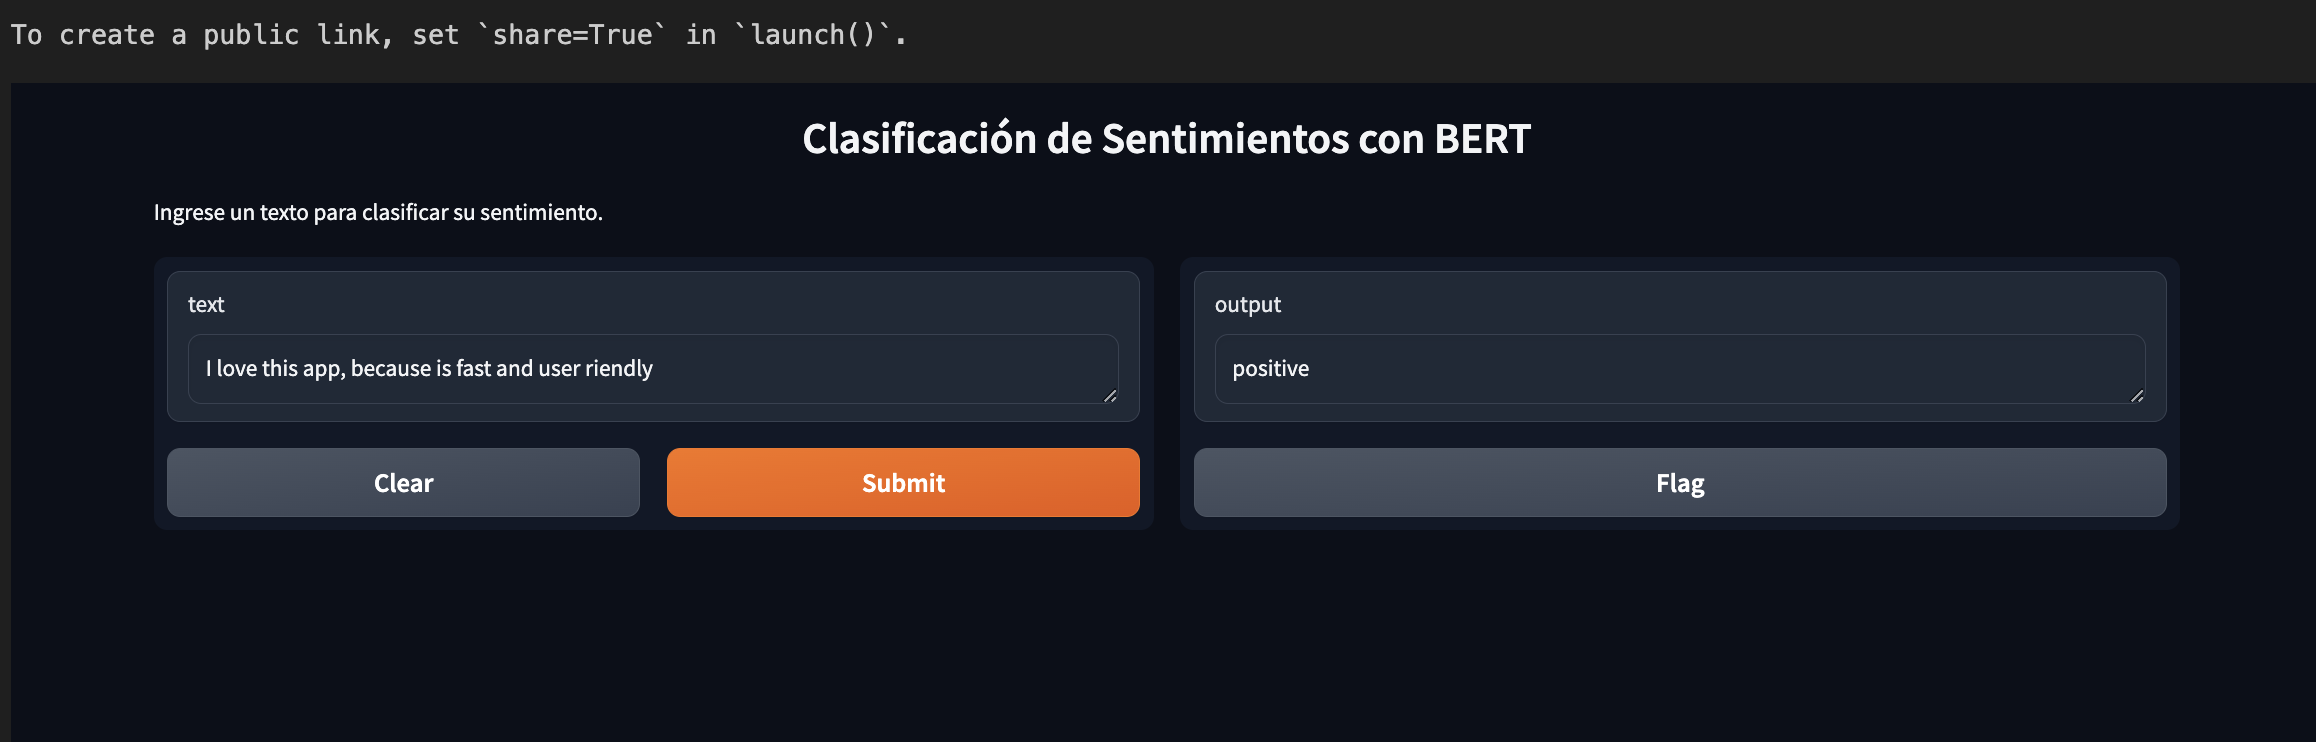

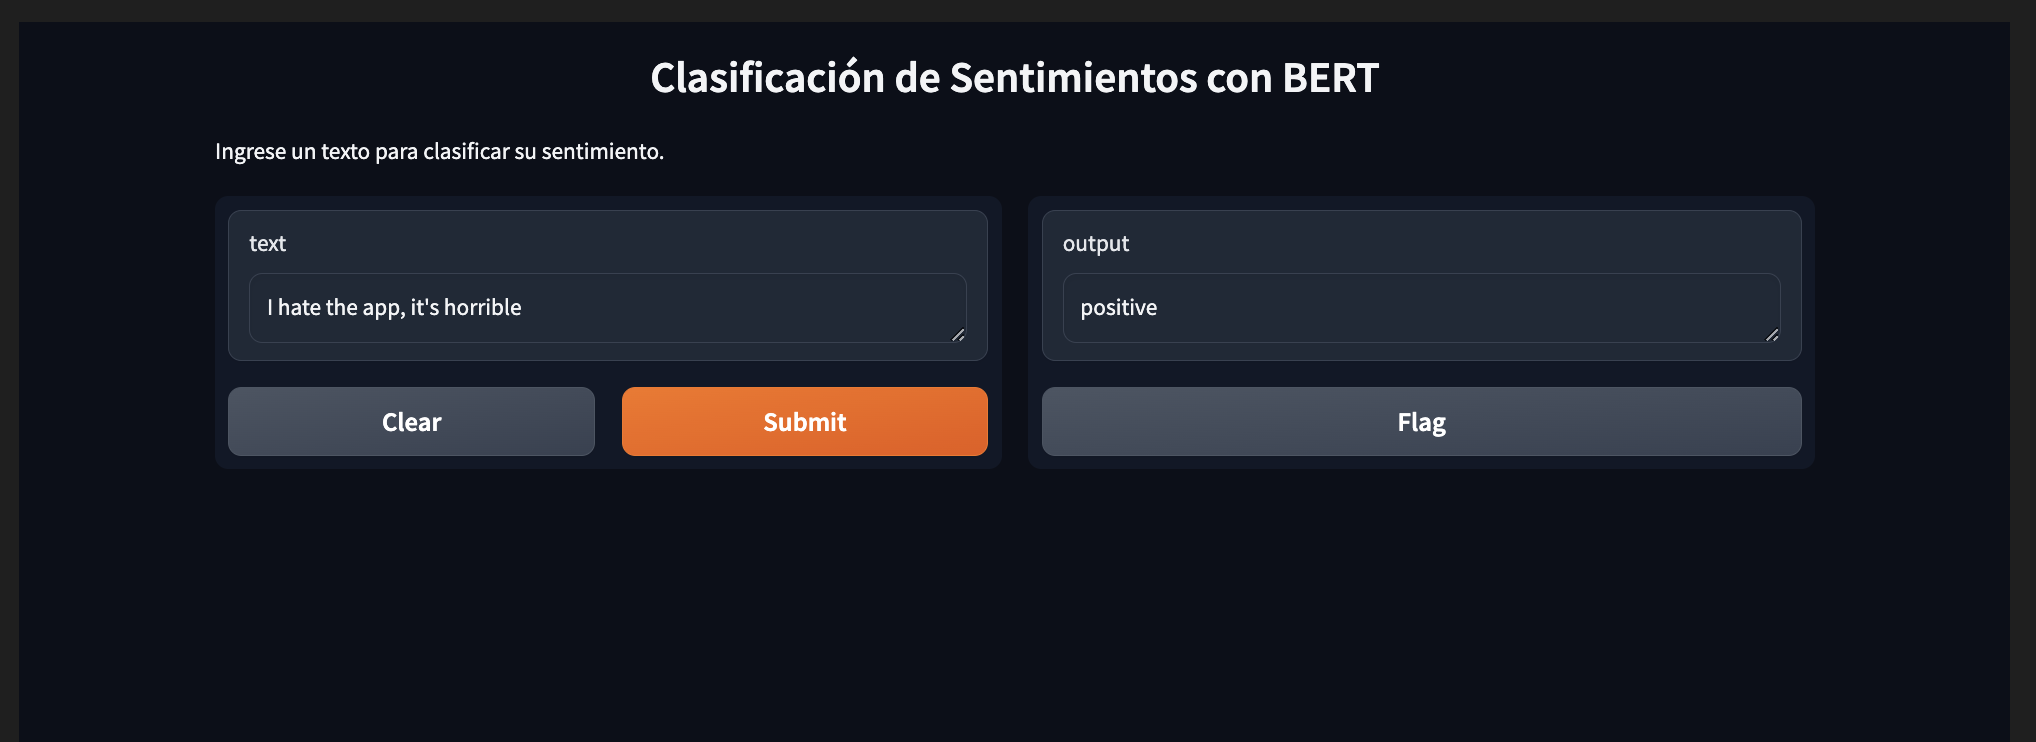

## Conclusiones

Luego de observar el informe de clasificación se obtiene que: 

1. Desempeño General del Modelo:

- El modelo sin fine-tuning tiene una precisión general del 34%, lo que indica un bajo rendimiento en la clasificación de las reseñas. El hecho de no realizar un ajuste fino en el modelo se refleja en los valores bajos de precisión, recall y F1-score.

2. Rendimiento por Clase:

- Clase "Negative": Esta clase muestra un rendimiento relativamente mejor en comparación con las otras clases, con una precisión del 33%, un recall del 48% y un F1-score del 39%. Aunque el modelo identifica mejor las reseñas negativas, su precisión sigue siendo baja.

- Clase "Neutral": El rendimiento en la clase neutral es el más bajo, con una precisión del 32%, un recall del 18% y un F1-score del 23%. Esto sugiere que el modelo tiene dificultades para identificar correctamente las reseñas neutras, probablemente confundiéndolas con reseñas positivas o negativas.

- Clase "Positive": La clase positiva tiene una precisión del 36%, un recall del 36% y un F1-score del 36%. Aunque el rendimiento es ligeramente mejor que en la clase neutral, sigue siendo insuficiente para aplicaciones prácticas.

3. Promedios Macro y Ponderados:

- Macro promedio: El promedio macro de 34% en precisión, 34% en recall y 33% en F1-score indica un rendimiento general bajo y consistente en todas las clases.
- Promedio ponderado: Similar a los promedios macro, el promedio ponderado refleja que el modelo no se desempeña bien en ninguna clase en particular, indicando la necesidad de mejorar el modelo a través del fine-tuning.